<a href="https://colab.research.google.com/github/Zabaluna/HW-Python/blob/analytics/Seminar4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128.0,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128.0,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256.0,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512.0,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256.0,SSD


Text(0, 0.5, 'Количество')

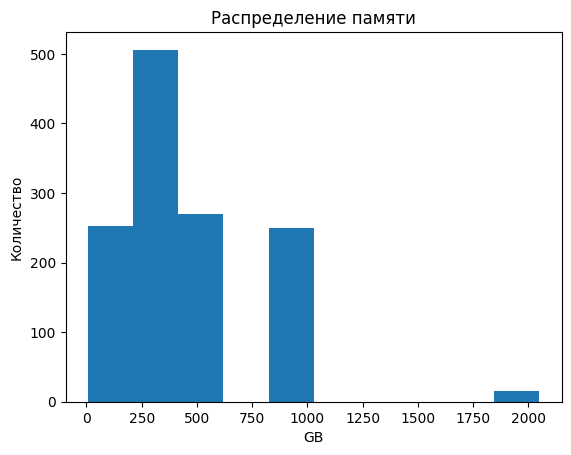

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество')

In [ ]:
plt.figure(figsize=(5, 4))



<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

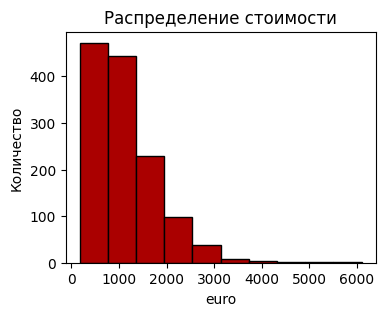

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(df['Price_euros'], color='#AA0000', edgecolor='black')
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('Количество');

1.3 Изучите вес ноутбуков с помощью matplotlib

Постройте график

Назовите график

Сделайте именование оси x и оси y


Сделайте выводы

Text(0, 0.5, 'Количество')

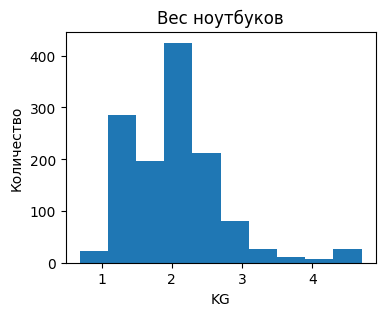

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(df['Weight'])
plt.title('Вес ноутбуков')
plt.xlabel('KG')
plt.ylabel('Количество')



##2.1 Изучите распределение типов носителя

Постройте график

Сделайте выводы



In [ ]:
data = df['Memory_Type'].value_counts()
data



SSD             639
HDD             576
FlashStorage     68
Hybrid           12
Name: Memory_Type, dtype: int64

In [ ]:
names = data.index
values = data.values
print(names)
print(values)

Index(['SSD', 'HDD', 'FlashStorage', 'Hybrid'], dtype='object')
[639 576  68  12]


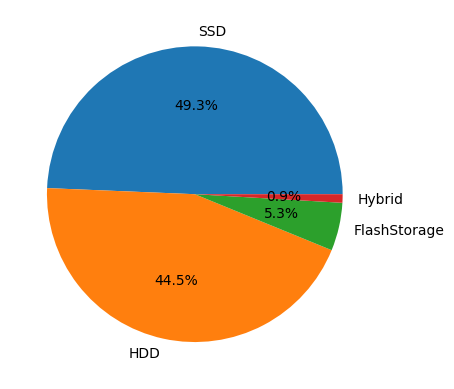

In [ ]:
plt.pie(values, autopct='%.1f%%', labels=names);

2.2 Изучите распределение компаний производителей

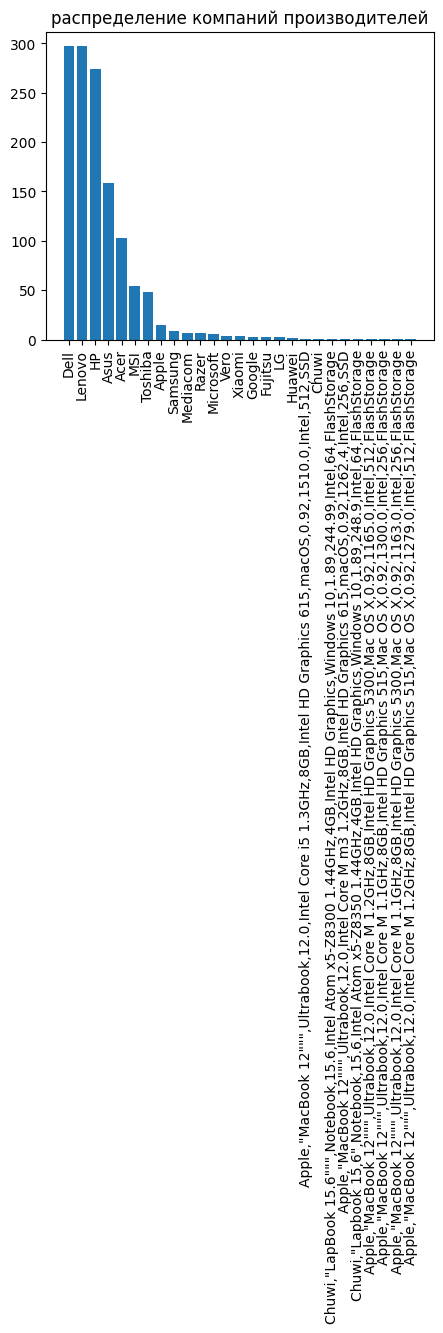

In [ ]:
data = df['Company'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(5, 4))
plt.bar(names, values)
plt.title('распределение компаний производителей')
plt.xticks(rotation=90);

2.3 Изучите распределение операционной системы

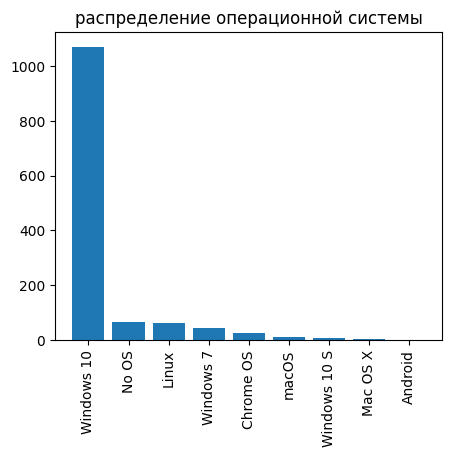

In [ ]:
data = df['OpSys'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(5, 4))
plt.bar(names, values)
plt.title('распределение операционной системы')
plt.xticks(rotation=90);

2.4 Изучите распределение компаний производителей CPU

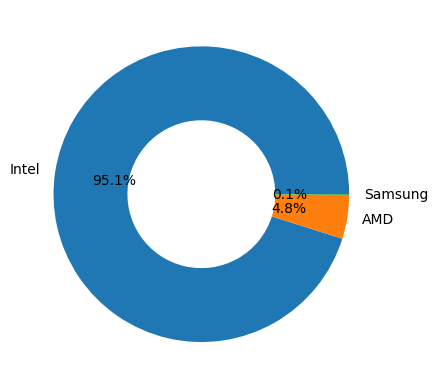

In [ ]:
data = df['Cpu_Company'].value_counts()
data
names = data.index
values = data.values
fig, ax = plt.subplots()
ax.pie(values, labels=names, autopct='%.1f%%', wedgeprops=dict(width=0.5));

#Задание 3.


Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте


3.1 Постройте график в абсолютных величинах


In [ ]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,15
2,Asus,11,147
3,Chuwi,0,1
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


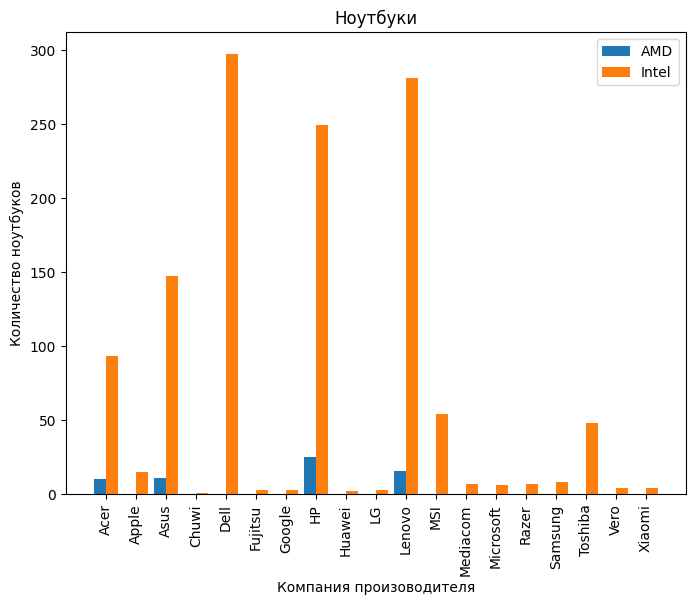

In [ ]:
import numpy as np

plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4 

plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)
plt.title('Ноутбуки')
plt.xlabel('Компания произоводителя')
plt.ylabel('Количество ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=90);

# 3.2 Постройте график в относительных величинах

In [ ]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()



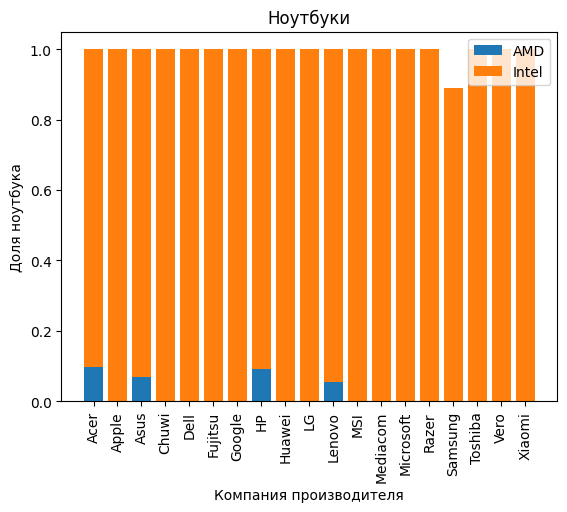

In [ ]:
plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Ноутбуки')
plt.xlabel('Компания производителя')
plt.ylabel('Доля ноутбука')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=90);

# Задание 4.

# 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы


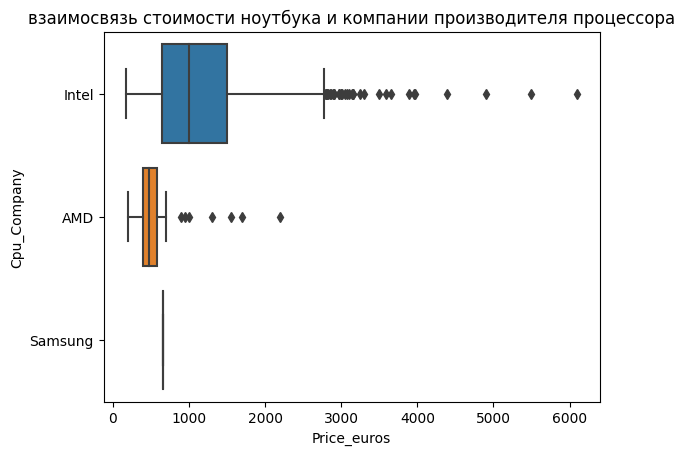

In [ ]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])
#showfliers=False

plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора')
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company');
            

            

# 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

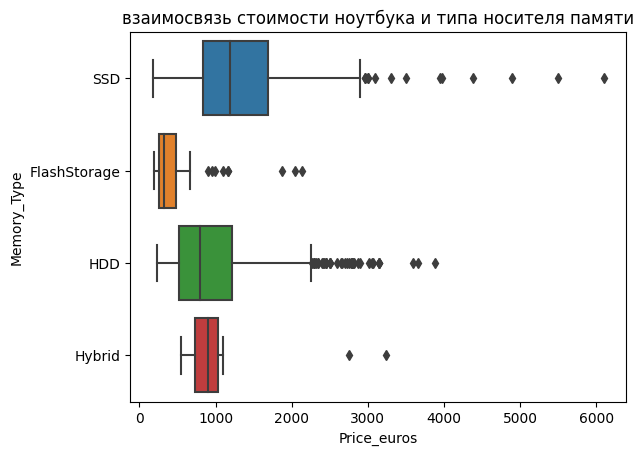

In [ ]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'])

plt.title('взаимосвязь стоимости ноутбука и типа носителя памяти')
plt.xlabel('Price_euros')
plt.ylabel('Memory_Type');

# 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

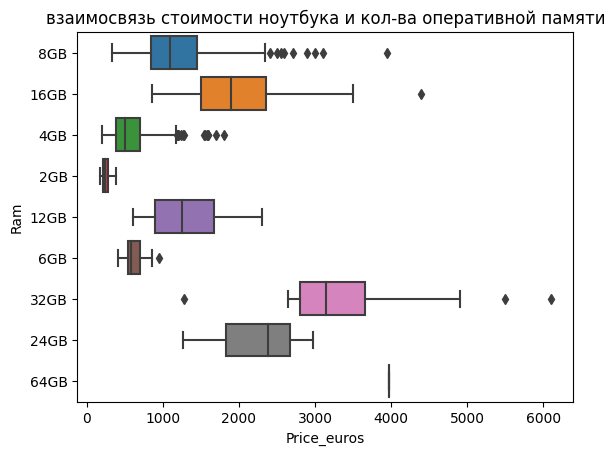

In [ ]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'])

plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти')
plt.xlabel('Price_euros')
plt.ylabel('Ram');

# 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

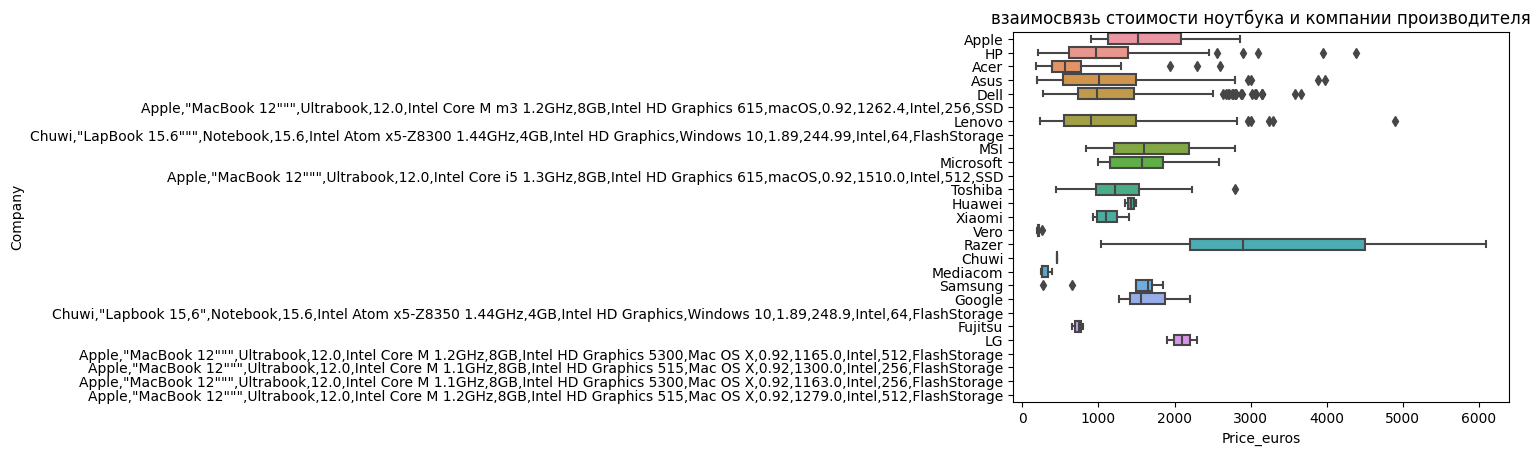

In [ ]:
sns.boxplot(x=df['Price_euros'], y=df['Company'])

plt.title('взаимосвязь стоимости ноутбука и компании производителя')
plt.xlabel('Price_euros')
plt.ylabel('Company');

# Задание 5*.


Постройте матрицу корреляций для таблицы

<ipython-input-27-e477327888a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


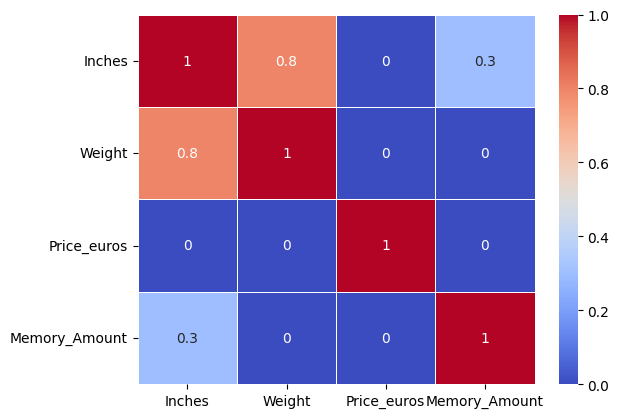

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix < 0.3)] = 0
corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

<ipython-input-31-6cae56e10d33>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


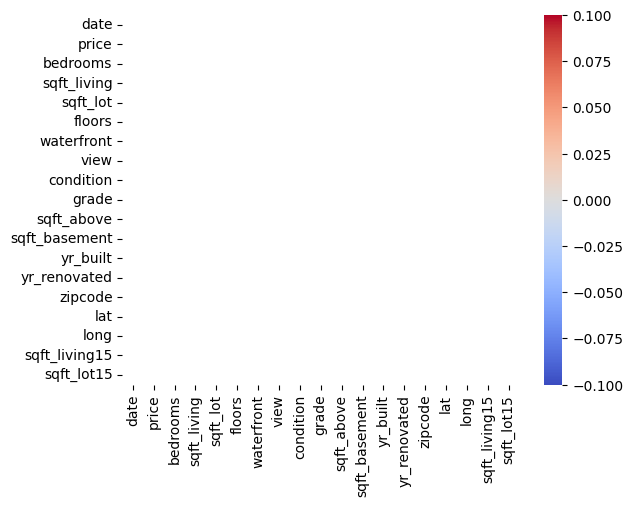

In [ ]:
df = pd.read_csv('kc_house_data.csv' , sep=',')
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix < 0.3)] = 0
corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm');

In [ ]:
# folium.CircleMarker(location=[point.lat, point.long]

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

this_map = folium.Map(prefer_canvs=True)

def plotDot(point):
    folium.CircleMarker(location=[point.lat, point.long], radius=2, popup=[point.price, point.floors]).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

ValueError: ignored